In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [40]:
data = pd.read_csv('Covid Data.csv', sep=',')

In [41]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [43]:
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


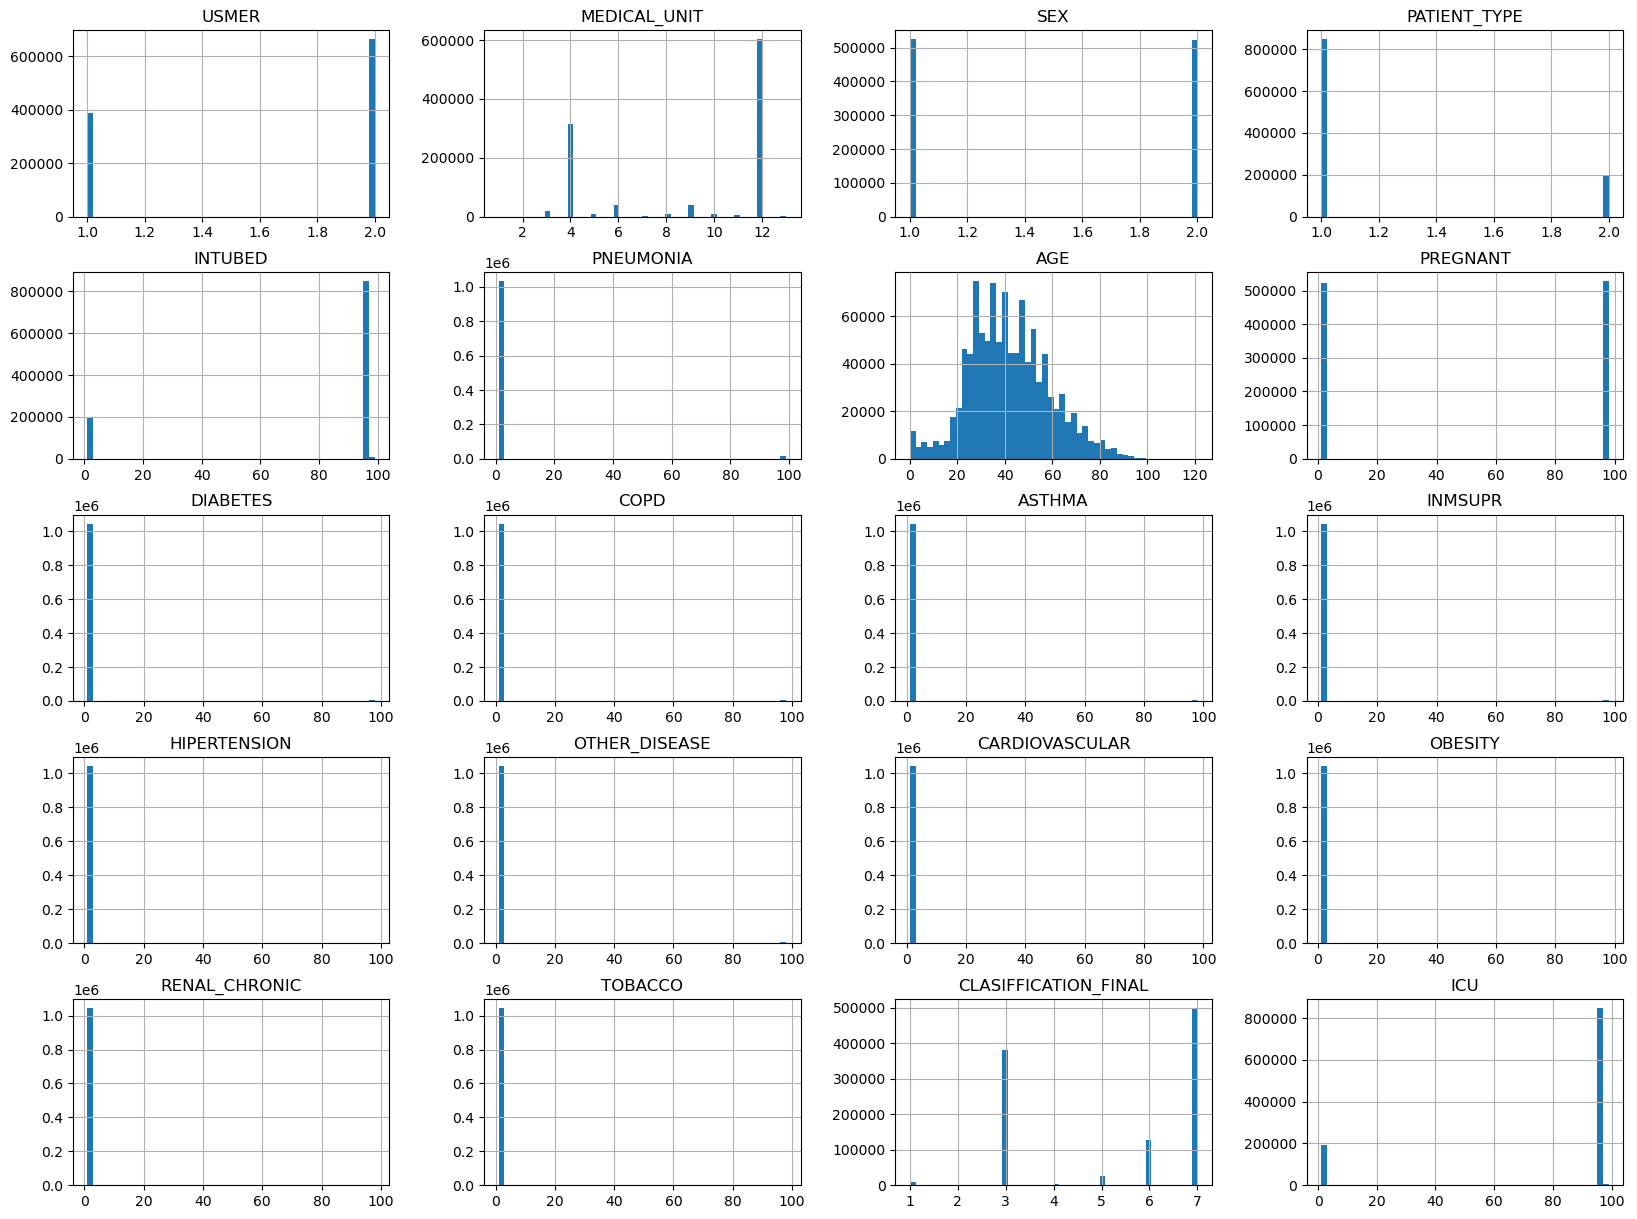

In [44]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [45]:
data["DEATH"] = [2 if each=="9999-99-99" else 1 for each in data.DATE_DIED]

In [46]:
data.drop(columns=["DATE_DIED"], inplace=True)

In [47]:
data['DEATH'].value_counts()

2    971633
1     76942
Name: DEATH, dtype: int64

In [48]:
data['INTUBED'].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [10]:
data.drop(columns=["INTUBED"], inplace=True)

In [11]:
data['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [12]:
data = data[data['PNEUMONIA'] <= 2]

In [13]:
result = data[(data['SEX'] == 1) & (data['PREGNANT'] == 97)]
result

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH


In [14]:
data = data[data['PREGNANT'] <= 97]

In [15]:
data = data[data['DIABETES'] <= 2]

In [16]:
data = data[data['COPD'] <= 2]

In [17]:
data = data[data['ASTHMA'] <= 2]

In [18]:
data = data[data['INMSUPR'] <= 2]

In [19]:
data = data[data['HIPERTENSION'] <= 2]

In [20]:
data = data[data['OTHER_DISEASE'] <= 2]

In [21]:
data = data[data['CARDIOVASCULAR'] <= 2]

In [22]:
data = data[data['OBESITY'] <= 2]

In [23]:
data = data[data['RENAL_CHRONIC'] <= 2]

In [24]:
data = data[data['TOBACCO'] <= 2]

In [25]:
data.drop(columns=["ICU"], inplace=True)

In [26]:
data.drop(columns=["SEX"], inplace=True)

In [27]:
data.CLASIFFICATION_FINAL = data.CLASIFFICATION_FINAL.replace([1,2,3], 1)

In [28]:
data.CLASIFFICATION_FINAL = data.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

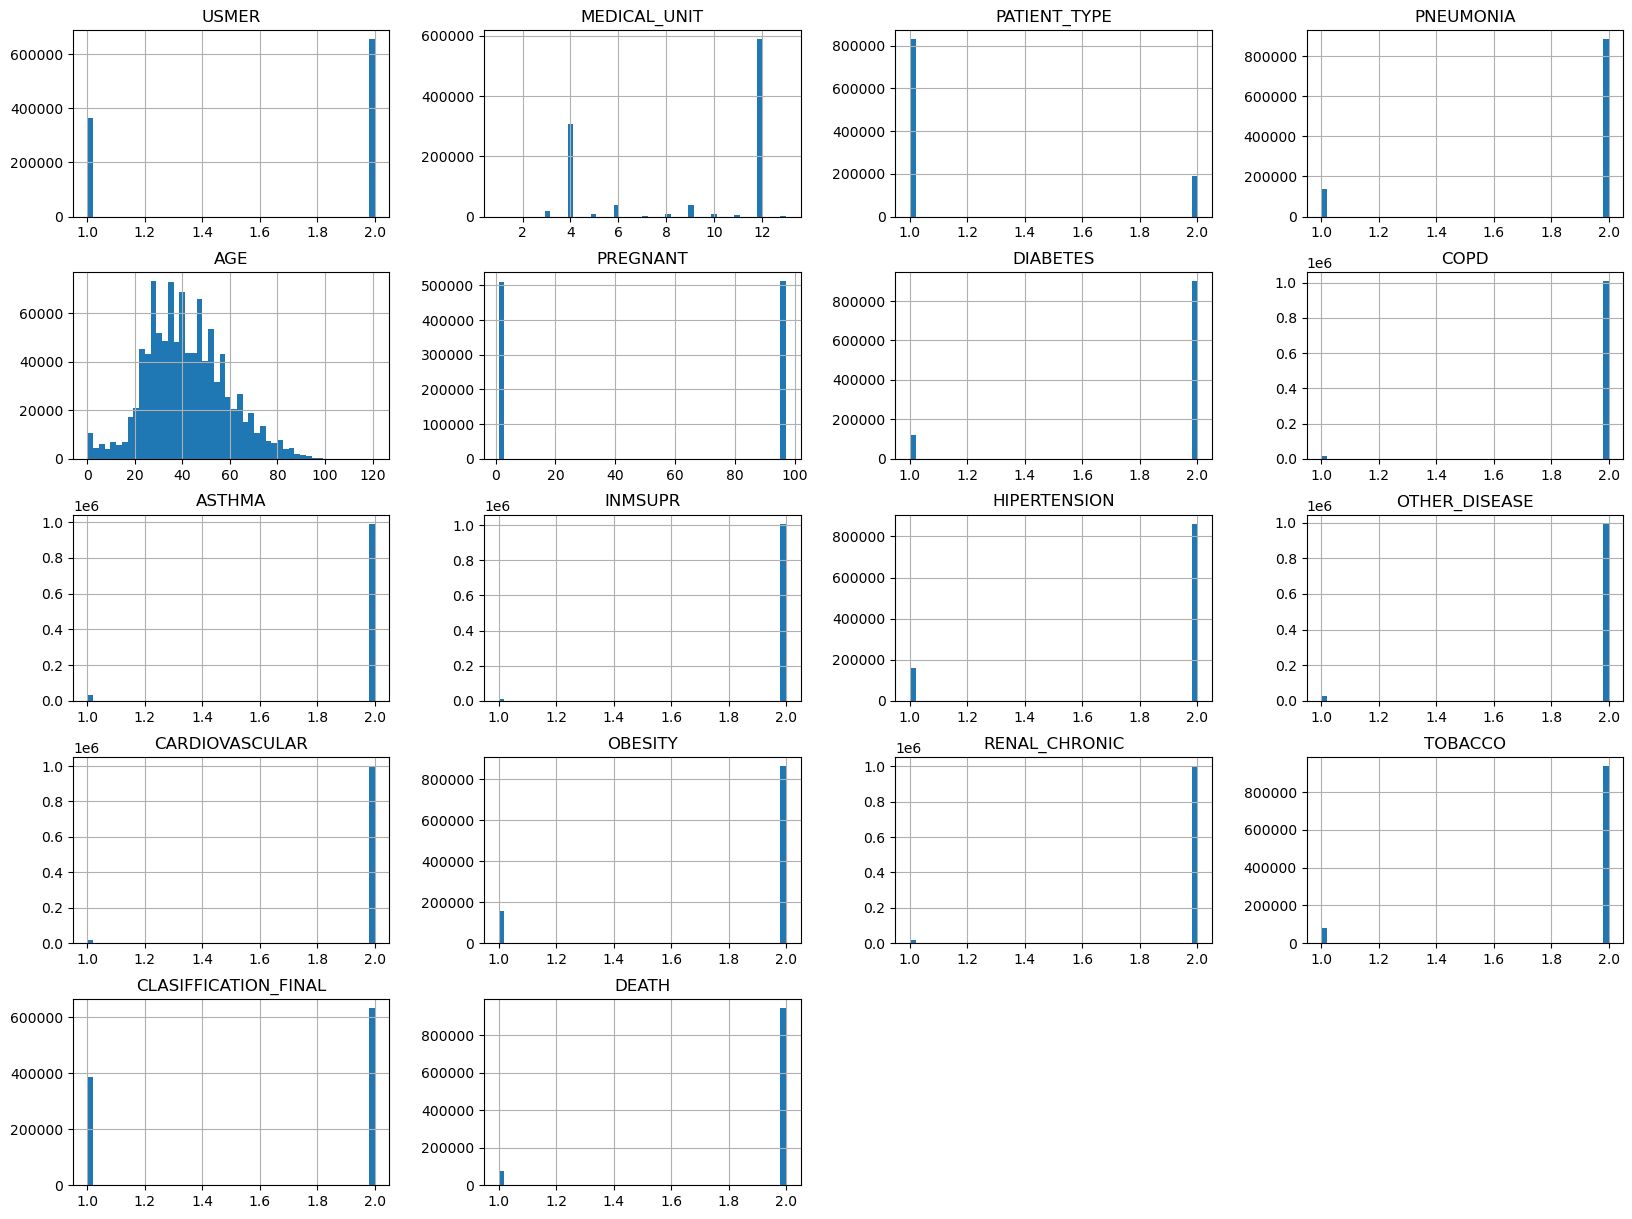

In [29]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
corr_matrix = data.corr()

In [31]:
corr_matrix["CLASIFFICATION_FINAL"].sort_values(ascending=False)

CLASIFFICATION_FINAL    1.000000
DEATH                   0.193804
PNEUMONIA               0.192553
DIABETES                0.094565
HIPERTENSION            0.087084
OBESITY                 0.071098
MEDICAL_UNIT            0.064988
USMER                   0.029181
RENAL_CHRONIC           0.014180
CARDIOVASCULAR          0.011378
COPD                    0.010668
OTHER_DISEASE          -0.004205
INMSUPR                -0.007456
ASTHMA                 -0.014462
TOBACCO                -0.020794
PREGNANT               -0.054196
AGE                    -0.152278
PATIENT_TYPE           -0.191145
Name: CLASIFFICATION_FINAL, dtype: float64

In [32]:
columns_to_drop = ['DIABETES','HIPERTENSION','OBESITY','MEDICAL_UNIT','USMER','RENAL_CHRONIC','CARDIOVASCULAR','COPD','OTHER_DISEASE','INMSUPR','ASTHMA','TOBACCO','PREGNANT']

In [33]:
data.drop(columns=columns_to_drop, inplace=True)

In [34]:
scaler = StandardScaler()

In [35]:
data['AGE'] = scaler.fit_transform(data[['AGE']])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   PATIENT_TYPE          1021977 non-null  int64  
 1   PNEUMONIA             1021977 non-null  int64  
 2   AGE                   1021977 non-null  float64
 3   CLASIFFICATION_FINAL  1021977 non-null  int64  
 4   DEATH                 1021977 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 46.8 MB


In [38]:
data.to_csv("covid-clean2.csv", index=False)